In [99]:
#dependencies

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier          #RFClassifier->Decision trees
from sklearn.model_selection import train_test_split


In [10]:
data = pd.read_csv('train.csv')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#choosing only the first 3 columns of the titanic database
a = data.iloc[3,0:3].values

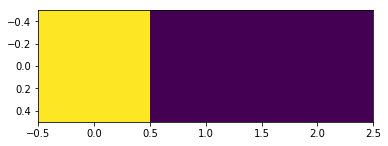

In [27]:
#3 columns are like ndarrays
a = a.reshape(1,3).astype('uint8')
plt.imshow(a)

In [51]:
#So,let us consider only columns having integer entries.
#Consider columns 0,1,2 arethe required data and the columns 6 and 7 have data not needed for us to build the model

#df_x has everything we have taken
df_x=data.iloc[:,0:3]

#df_y has everything that we don't want->Take only integer values from the dataset.
df_y=data.iloc[:,6:8]

In [52]:
x_train , x_test ,y_train , y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [53]:
#we need only this data:
x_train.head()

,PassengerId,Survived,Pclass
42,43,0,3
684,685,0,2
605,606,0,3
409,410,0,3
740,741,1,1


In [54]:
#data that we don't need
y_train.head()

,SibSp,Parch
42,0,0
684,1,1
605,1,0
409,3,1
740,0,0


In [56]:
rf = RandomForestClassifier(n_estimators=100)
#The command below works only for integers->not applicable for float and string
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
#prediction on test dat->x_test and y_test
pred = rf.predict(x_test)

In [117]:
pred

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [4., 2.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [2., 0.],
       [0., 0.],
       [1., 2.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [118]:
#check prediction accuracy

s=y_test.values
#calculate number of correctly predicted values

equality_test=np.equal(pred,s)
#equality_test
count=0

for i in range(len(pred)):
    if(equality_test[i][0]==True or equality_test[i][1]==True):
        count=count+1



In [119]:
count

141

In [120]:
# total values that pred code was run on
len(pred)

179

In [ ]:
#Conclusion:
#model has 78.77% accuracy as out of 179 values tested,141 predicted values are the same as that of the actual values in s